### Creating the Perfect Unit Circle using Interpolations

##### To create a circle, use the definition of the unit circle, where the x axis is defined as  $cos(t)$  and the y axis is defined as  $sin(t)$.
##### Using a superposition of the values at the x axis and y axis, one could create a circle.
##### A circle can also be created using interpolations of data, using different kinds of interpolations

In [21]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange, interp1d, CubicSpline, Rbf
from numpy import sqrt, sin, cos, pi, abs, arctan, tan, linspace, polyfit

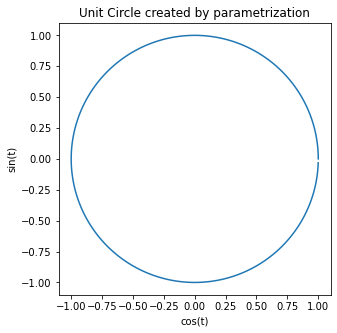

In [22]:
t = np.arange(0, 2*pi, 0.01*pi) # t vector for parametrization

def param_circle(t):
    # input: the t vector used for the cos(t) and sin(t) functions is a vector at the range [0,2pi]
    #        with intervals of interval * pi
    
    # This function creates a unit circle using the parametrization
    # return the x, y axis as explained
    return [cos(t),sin(t)]


# Plotting the unit circle at x, y coordinates
x, y = param_circle(t)

fig = plt.figure(figsize = (5,5))
axis = fig.add_subplot()
axis.plot(x,y)
axis.set_aspect(1)
plt.title('Unit Circle created by parametrization')
plt.xlabel('cos(t)')
plt.ylabel('sin(t)') 
plt.show()

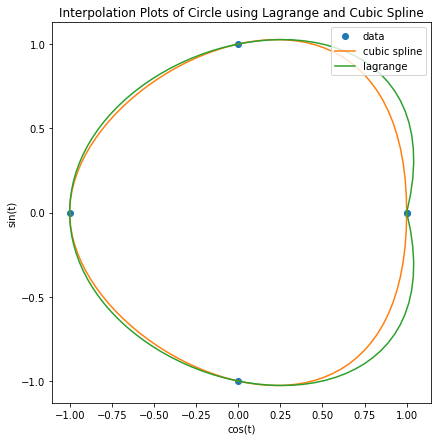

In [23]:
# t vector for parametrization with different interval - 4 points
t = np.arange(0, pi*2 + 1, 0.5*pi) # 2pi + 1 to add both 0 and 2pi to the function

def interpolated_circle(t):
    # input: the t vector used for the cos(t) and sin(t) functions is a vector at the range [0,2pi]
    #        with intervals of interval * pi
    
    # This function creates a unit circle using the interpolation methods CubicSpline and Lagrange
    x,y = param_circle(t)
    
    # creating the CubicSpline interpolation
    x_spline = interp1d(t, x, kind='cubic')
    y_spline = interp1d(t, y, kind='cubic')
    
    # create a Polynomial interpolation using the Lagrange method
    x_lagrange = lagrange(t, x)
    y_lagrange = lagrange(t, y)
    
    # returns the x, y axis for each method
    return [x,y,x_spline,y_spline,x_lagrange,y_lagrange]



# set a new vector with 100 points in the range of [0,2pi], for the interpolations
t_new = np.linspace(0, 2*pi, 100)
x,y,x_spline,y_spline,x_lagrange,y_lagrange = interpolated_circle(t)

# Plot the unit circle
fig = plt.figure(figsize = (7,7))
axis = fig.add_subplot()
axis.plot(x,y,'o', x_spline(t_new), y_spline(t_new), x_lagrange(t_new), y_lagrange(t_new))
axis.set_aspect(1) 
plt.legend(['data', 'cubic spline', 'lagrange'], loc ='upper right')
plt.title('Interpolation Plots of Circle using Lagrange and Cubic Spline')
plt.xlabel('cos(t)')
plt.ylabel('sin(t)')
plt.show()   

#### But the interpolated circles don't aren't symmetrical! This occurs because there are only 4 data points, so the interpolation doesn't give an exact description of the circle.
#### To fix this, one can use the CubicSpline method from the Scipy library, or add more data points.

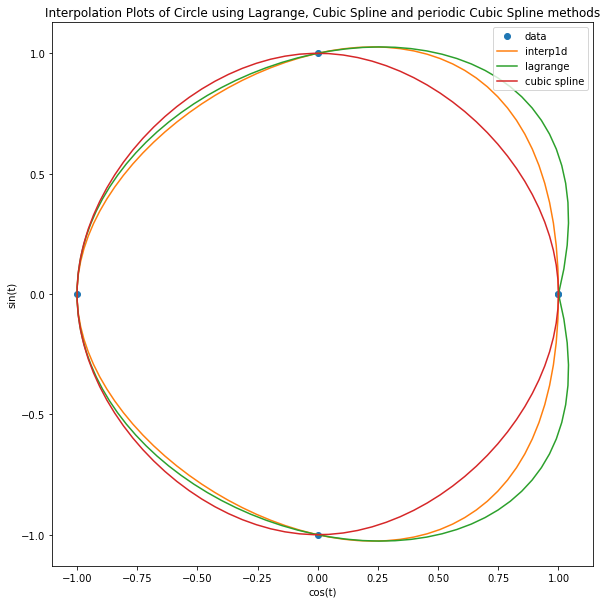

In [24]:
def fix_inter_circle(t):
    # input: the t vector used for the cos(t) and sin(t) functions is a vector at the range [0,2pi]
    #        with intervals of interval * pi
    
    # This function creates a unit circle using the interpolation method of the periodic CubicSpline
    x,y = param_circle(t)
    
    # creating the periodic CubicSpline interpolation
    x_cspline = CubicSpline(t, x, bc_type='periodic')
    y_cspline = CubicSpline(t, y, bc_type='periodic')
    
    # returns the x, y axis for each method
    return [x_cspline,y_cspline]


# set a new vector with 100 points in the range of [0,2pi], for the interpolations
t_new = np.linspace(0, 2*pi, 100)

x,y,x_spline,y_spline,x_lagrange,y_lagrange = interpolated_circle(t)
x_cspline,y_cspline = fix_inter_circle(t)


# Plot the unit circle
fig = plt.figure(figsize = (10,10))
axis = fig.add_subplot()
axis.plot(x,y,'o', x_spline(t_new), y_spline(t_new), x_lagrange(t_new), y_lagrange(t_new), x_cspline(t_new), y_cspline(t_new))
axis.set_aspect(1)
plt.legend(['data', 'interp1d', 'lagrange', 'cubic spline'], loc ='upper right')
plt.title('Interpolation Plots of Circle using Lagrange, Cubic Spline and periodic Cubic Spline methods')
plt.xlabel('cos(t)')
plt.ylabel('sin(t)')
plt.show()